# Multivariate: fPCA

## Import libraries

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import synthia as syn
import pyvinecopulib as pv
from multiprocessing import cpu_count

## Define plotting function

In [2]:
def plot_profiles(ds, var_name, n_profiles=100):
    _, ax = plt.subplots(figsize=(6, 4))
    for column in np.random.choice(ds.column, n_profiles):
        ds[var_name].sel(column=column).plot(ax=ax, c='#332288', alpha=0.15)
    ax.set_ylabel('Air temperature in K')
    ax.set_xlabel('Atmospheric level')

## Plot source data

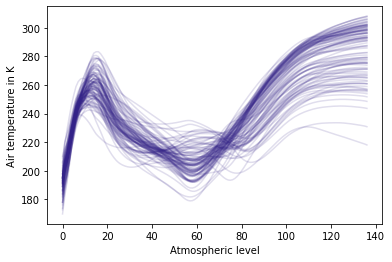

In [3]:
ds_true = syn.util.load_dataset(name='SAF-Synthetic')
plot_profiles(ds_true, 'temperature_fl')

## Fit the fPCA model using 10 components

In [4]:
generator = syn.FPCADataGenerator()
generator.fit(ds_true, n_fpca_components=10)

## Generate same number of samples as in the input

In [5]:
N_SAMPLES = 100
ds_synth = generator.generate(n_samples=N_SAMPLES)
ds_synth

<xarray.Dataset>
Dimensions:         (column: 100, level: 137)
Dimensions without coordinates: column, level
Data variables:
    temperature_fl  (column, level) float32 195.9973 208.78938 ... 277.3322

## Plot the results

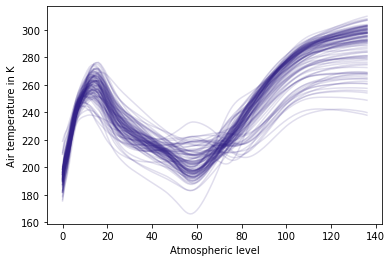

In [6]:
plot_profiles(ds_true, 'temperature_fl')